In [104]:
from tensorflow import keras
import pandas as pd
import numpy as np
import wfdb
import ast
import itertools
import matplotlib.pyplot as plt

In [105]:
PATH = './'
SAMPLING_RATE = 100
NUM_LEADS = 12
NUM_SECONDS = 10
TEST_FOLD = 10

In [106]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [107]:
Y = pd.read_csv(PATH+'ptbxl_database.csv', index_col='ecg_id')

In [108]:
Y.scp_codes

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [109]:
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [110]:
Y.scp_codes

ecg_id
1                 {'NORM': 100.0, 'LVOLT': 0.0, 'SR': 0.0}
2                             {'NORM': 80.0, 'SBRAD': 0.0}
3                               {'NORM': 100.0, 'SR': 0.0}
4                               {'NORM': 100.0, 'SR': 0.0}
5                               {'NORM': 100.0, 'SR': 0.0}
                               ...                        
21833    {'NDT': 100.0, 'PVC': 100.0, 'VCLVH': 0.0, 'ST...
21834             {'NORM': 100.0, 'ABQRS': 0.0, 'SR': 0.0}
21835                           {'ISCAS': 50.0, 'SR': 0.0}
21836                           {'NORM': 100.0, 'SR': 0.0}
21837                           {'NORM': 100.0, 'SR': 0.0}
Name: scp_codes, Length: 21837, dtype: object

In [172]:
Y = Y.head(100)

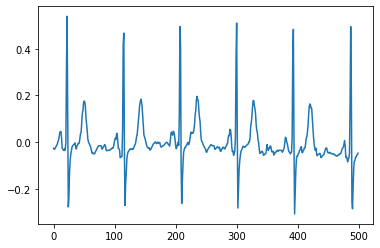

In [179]:
X = load_raw_data(Y, SAMPLING_RATE, PATH)
plt.figure()
plt.plot(X[0,0:500,9])

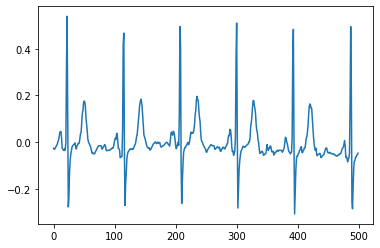

In [195]:
X = X.reshape(len(X), SAMPLING_RATE * NUM_SECONDS * NUM_LEADS, order='F')
plt.plot(X[0,9000:9500])

In [196]:
agg_df = pd.read_csv(PATH+'scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [197]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [198]:
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [199]:
set(itertools.chain.from_iterable(Y.diagnostic_superclass))

{'CD', 'HYP', 'MI', 'NORM', 'STTC'}

In [200]:
x_train = X[np.where(Y.strat_fold != TEST_FOLD)]
y_train = Y[(Y.strat_fold != TEST_FOLD)].diagnostic_superclass

In [201]:
x_test = X[np.where(Y.strat_fold == TEST_FOLD)]
y_test = Y[Y.strat_fold == TEST_FOLD].diagnostic_superclass

In [202]:
x_train.shape

(88, 12000)

In [203]:
plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

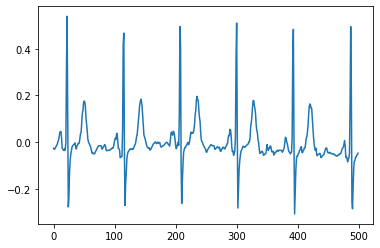

In [205]:
onda = 1000 * 9
plt.plot(x_train[0,9000:9500])